In [1]:
import pandas as pd
data = pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")
data

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [2]:
data['Sport'] = data['Sport'].map(str.lower)
data.groupby(data['Sport']).size()

Sport
american football               17
american football / baseball     1
auto racing                     18
auto racing (nascar)             2
baseball                         6
basketball                      81
boxing                          46
cycling                          1
f1 motorsports                   5
f1 racing                        8
golf                            44
hockey                           1
ice hockey                       3
mma                              1
motorcycle gp                    4
nascar                           3
nba                              1
nfl                              3
soccer                          33
tennis                          23
dtype: int64

In [3]:
for i in range(len(data['Sport'])):
    if data["Sport"][i] == 'hockey':
        data["Sport"][i] = 'ice hockey'
    if data["Sport"][i] == 'nfl':
        data['Sport'][i] = 'american football'
    if data["Sport"][i] == 'auto racing (nascar)' or data["Sport"][i] == 'f1 motorsports' or data["Sport"][i] == 'f1 racing' or data["Sport"][i] == 'nascar' or data["Sport"][i] == 'motorcycle gp':
        data['Sport'][i] = 'auto racing'
    if data["Sport"][i] == 'nba':
        data['Sport'][i] = 'basketball'
data.groupby(data['Sport']).size()

C:\Users\Christopher\AppData\Local\Temp\ipykernel_64368\403712999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sport'][i] = 'american football'
C:\Users\Christopher\AppData\Local\Temp\ipykernel_64368\403712999.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sport'][i] = 'basketball'
C:\Users\Christopher\AppData\Local\Temp\ipykernel_64368\403712999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sport'][

Sport
american football               20
american football / baseball     1
auto racing                     40
baseball                         6
basketball                      82
boxing                          46
cycling                          1
golf                            44
ice hockey                       4
mma                              1
soccer                          33
tennis                          23
dtype: int64

(array([86., 44., 82., 23., 20.,  6.,  4.,  1., 33.,  2.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

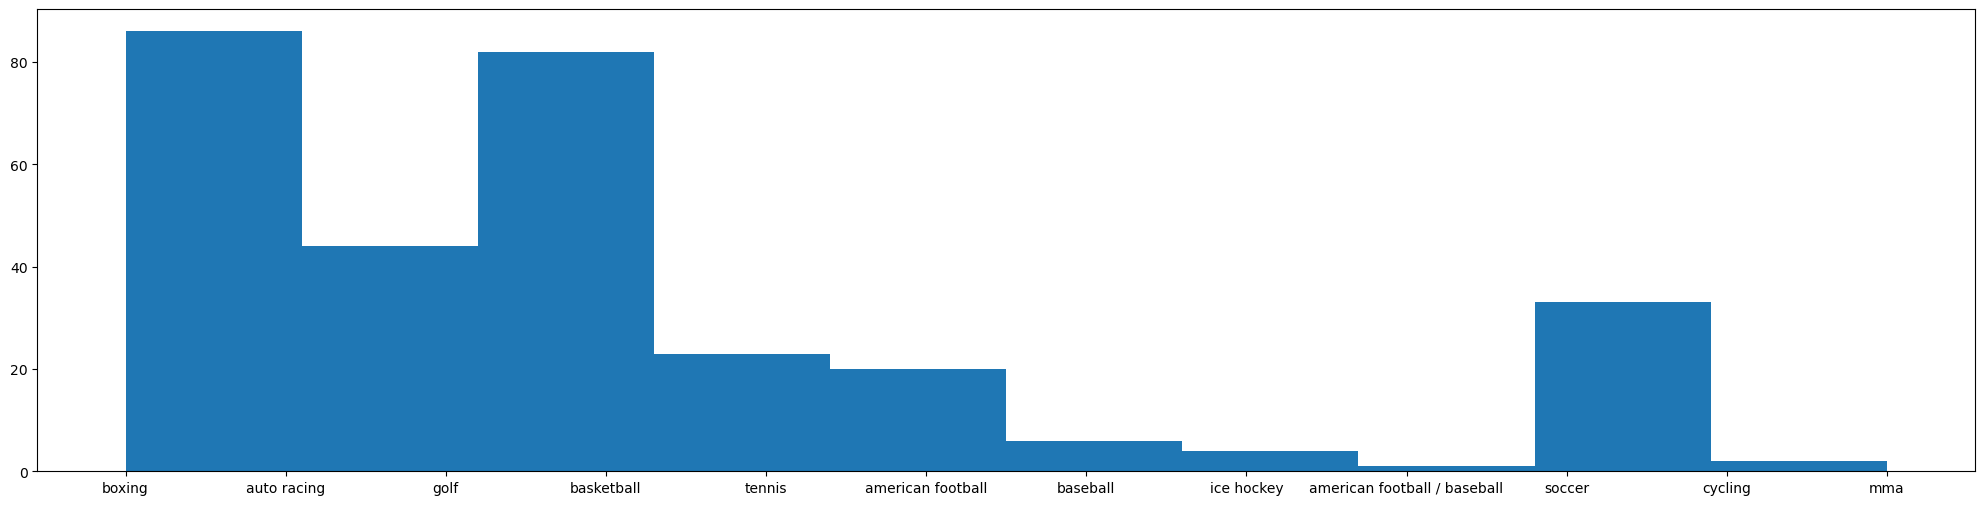

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,6))
plt.hist(data['Sport'])

(array([218.,   7.,  14.,  14.,   7.,  15.,  11.,  10.,   2.,   3.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

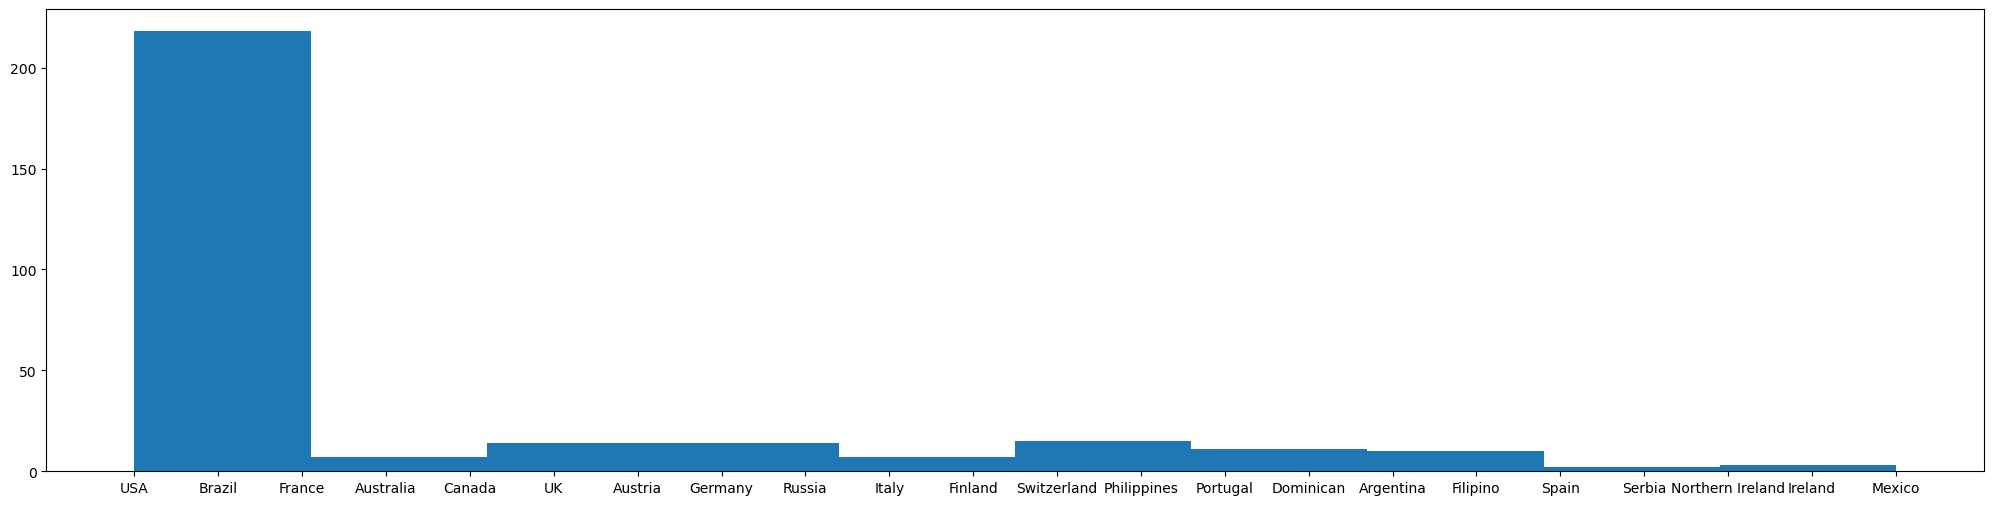

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,6))
plt.hist(data['Nationality'])

In [5]:
data_no_name = data.dropna().drop("Name", axis = 1)
data_no_name

,S.NO,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
10,11,USA,1,8,boxing,1991,60.5
11,12,USA,2,1,boxing,1991,31.5
12,13,USA,3,8,basketball,1991,16.0
13,14,USA,4,>30,boxing,1991,14.5
14,15,Brazil,5,4,auto racing,1991,13.0
...,...,...,...,...,...,...,...
296,297,USA,6,9,basketball,2020,74.4
297,298,USA,7,10,basketball,2020,63.9
298,299,USA,8,11,golf,2020,62.3
299,300,USA,9,>100,american football,2020,60.5


In [6]:
data_no_name = pd.get_dummies(data_no_name, drop_first = True)
data_no_name.columns

Index(['S.NO', 'Current Rank', 'Year', 'earnings ($ million)',
       'Nationality_Austria', 'Nationality_Brazil', 'Nationality_Canada',
       'Nationality_Dominican', 'Nationality_Filipino', 'Nationality_Finland',
       'Nationality_France', 'Nationality_Germany', 'Nationality_Ireland',
       'Nationality_Italy', 'Nationality_Mexico',
       'Nationality_Northern Ireland', 'Nationality_Philippines',
       'Nationality_Portugal', 'Nationality_Serbia', 'Nationality_Spain',
       'Nationality_Switzerland', 'Nationality_UK', 'Nationality_USA',
       'Previous Year Rank_10', 'Previous Year Rank_11',
       'Previous Year Rank_12', 'Previous Year Rank_13',
       'Previous Year Rank_14', 'Previous Year Rank_15',
       'Previous Year Rank_17', 'Previous Year Rank_18',
       'Previous Year Rank_19', 'Previous Year Rank_2',
       'Previous Year Rank_20', 'Previous Year Rank_21',
       'Previous Year Rank_22', 'Previous Year Rank_24',
       'Previous Year Rank_26', 'Previous Year Ran

In [7]:
data_no_name.corr()

,S.NO,Current Rank,Year,earnings ($ million),Nationality_Austria,Nationality_Brazil,Nationality_Canada,Nationality_Dominican,Nationality_Filipino,Nationality_Finland,...,Sport_auto racing,Sport_baseball,Sport_basketball,Sport_boxing,Sport_cycling,Sport_golf,Sport_ice hockey,Sport_mma,Sport_soccer,Sport_tennis
S.NO,1.000000,0.012460,0.999027,0.631775,-0.080241,0.005064,-0.144294,0.037349,0.040217,0.022964,...,-0.226873,-0.035385,0.021864,-0.223945,-0.004954,0.006123,-0.118714,0.084672,0.328815,0.052221
Current Rank,0.012460,1.000000,-0.021537,-0.463610,-0.008762,-0.025103,0.160938,0.054552,-0.072076,-0.064148,...,0.039885,0.132384,0.015454,-0.192555,0.075657,-0.117153,0.094832,-0.029867,-0.065254,0.102990
Year,0.999027,-0.021537,1.000000,0.644267,-0.080924,0.004842,-0.148987,0.036112,0.042997,0.026873,...,-0.225444,-0.036511,0.022817,-0.220842,-0.005194,0.011366,-0.124717,0.084304,0.330250,0.047355
earnings ($ million),0.631775,-0.463610,0.644267,1.000000,-0.059874,0.021336,-0.134796,-0.021784,0.026049,-0.013232,...,-0.160372,-0.085860,-0.088615,0.079424,-0.034186,0.067771,-0.098539,0.091598,0.217370,-0.027154
Nationality_Austria,-0.080241,-0.008762,-0.080924,-0.059874,1.000000,-0.010380,-0.008956,-0.003623,-0.003623,-0.006298,...,0.158277,-0.008161,-0.037013,-0.025089,-0.003623,-0.024366,-0.006298,-0.003623,-0.022136,-0.018113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sport_golf,0.006123,-0.117153,0.011366,0.067771,-0.024366,-0.069809,-0.060233,-0.024366,-0.024366,-0.042357,...,-0.153947,-0.054884,-0.248916,-0.168725,-0.024366,1.000000,-0.042357,-0.024366,-0.148870,-0.121812
Sport_ice hockey,-0.118714,0.094832,-0.124717,-0.098539,-0.006298,-0.018045,0.703225,-0.006298,-0.006298,-0.010949,...,-0.039793,-0.014187,-0.064342,-0.043614,-0.006298,-0.042357,1.000000,-0.006298,-0.038481,-0.031487
Sport_mma,0.084672,-0.029867,0.084304,0.091598,-0.003623,-0.010380,-0.008956,-0.003623,-0.003623,-0.006298,...,-0.022891,-0.008161,-0.037013,-0.025089,-0.003623,-0.024366,-0.006298,1.000000,-0.022136,-0.018113
Sport_soccer,0.328815,-0.065254,0.330250,0.217370,-0.022136,0.269298,-0.054721,-0.022136,-0.022136,-0.038481,...,-0.139858,-0.049861,-0.226137,-0.153284,-0.022136,-0.148870,-0.038481,-0.022136,1.000000,-0.110665


In [15]:
data_no_name = data_no_name.drop(['Current Rank',  'S.NO'], axis = 1)
# y = data_no_name['earnings ($ million)']
# X

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
def insurance_reg(factor, target, data):
    x_train, X_test, y_train, y_test = train_test_split(data_no_name[factor], data_no_name[target], 
                                                        test_size = 0.25, random_state = 10)
    mod = GradientBoostingRegressor(random_state=25) #try the regression models imported above
    mod.fit(x_train, y_train)
    y_pred = mod.predict(X_test)
    
    R2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MedAE = median_absolute_error(y_test, y_pred)
    
    return R2, MSE, MAE, MedAE

factor_combos = [
     (['Nationality_Austria', 'Nationality_Brazil', 'Nationality_Canada',
       'Nationality_Dominican', 'Nationality_Filipino', 'Nationality_Finland',
       'Nationality_France', 'Nationality_Germany', 'Nationality_Ireland',
       'Nationality_Italy', 'Nationality_Mexico',
       'Nationality_Northern Ireland', 'Nationality_Philippines',
       'Nationality_Portugal', 'Nationality_Serbia', 'Nationality_Spain',
       'Nationality_Switzerland', 'Nationality_UK', 'Nationality_USA'], 'earnings ($ million)'),
    (['Sport_american football / baseball',
       'Sport_auto racing', 'Sport_baseball', 'Sport_basketball',
       'Sport_boxing', 'Sport_cycling', 'Sport_golf', 'Sport_ice hockey',
       'Sport_mma', 'Sport_soccer', 'Sport_tennis'], 'earnings ($ million)'),
    (['Year'], 'earnings ($ million)')
   ] #can add as many combinations to test against charges

for i in factor_combos:
    factor, target = i
    R2,MSE,MAE,MedAE = insurance_reg(factor, target, data_no_name)
    
    print(f"Features: {', '.join(factor)}")
    print(f"Target: {target}")
    print('~ R2:', R2)
    print('~ MSE:', MSE)
    print('~ Mean Absolute Error:', MAE)
    print('~ Median Absolute Error:', MedAE)
    print("")

print()
print("***************** Region Comparsion ******************")
# region_combos = [
#      (['region_northeast'], 'charges'),
#      (['region_northwest'], 'charges'),
#      (['region_southeast'], 'charges'),
#      (['region_southwest'], 'charges')] #can add as many combinations to test against charges

# print()
# for i in region_combos:
#     factor, target = i
#     R2,MSE,MAE,MedAE = insurance_reg(factor, target, dat_dropped)
    
#     print(f"Features: {', '.join(factor)}")
#     print(f"Target: {target}")
#     print('~ R2:', R2)
#     print('~ MSE:', MSE)
#     print('~ Mean Absolute Error:', MAE)
#     print('~ Median Absolute Error:', MedAE)
#     print("")

Features: Nationality_Austria, Nationality_Brazil, Nationality_Canada, Nationality_Dominican, Nationality_Filipino, Nationality_Finland, Nationality_France, Nationality_Germany, Nationality_Ireland, Nationality_Italy, Nationality_Mexico, Nationality_Northern Ireland, Nationality_Philippines, Nationality_Portugal, Nationality_Serbia, Nationality_Spain, Nationality_Switzerland, Nationality_UK, Nationality_USA
Target: earnings ($ million)
~ R2: -0.00016451439980058602
~ MSE: 746.8688423053852
~ Mean Absolute Error: 20.938985987660885
~ Median Absolute Error: 16.75

Features: Sport_american football / baseball, Sport_auto racing, Sport_baseball, Sport_basketball, Sport_boxing, Sport_cycling, Sport_golf, Sport_ice hockey, Sport_mma, Sport_soccer, Sport_tennis
Target: earnings ($ million)
~ R2: 0.12481775370592885
~ MSE: 653.5388345467676
~ Mean Absolute Error: 20.454332009822814
~ Median Absolute Error: 18.059980579287497

Features: Year
Target: earnings ($ million)
~ R2: 0.4795057013726358